# 1. Importando Bibliotecas

In [124]:
import pandas as pd
import seaborn as sns
import string 
import re
from unidecode import unidecode
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Madruga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Abrindo datasets

In [90]:
dados_bozo=pd.read_csv('jairbolsonaro.csv',sep=';') #importando cvs do Bozo

In [91]:
 dados_lula= pd.read_csv('LulaOficial.csv',sep=';')  #importando cvs do Lula

In [92]:
dados_bozo

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Thu Apr 01 02:59:50 +0000 2010,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Jan 10 11:02:23 +0000 2019,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",False,NaN,NaN,NaN,NaN
2,Fri Jul 19 02:04:16 +0000 2019,1152036400138579968,1152036400138579968,- Para descontrair. Proibido queimar ovo. (Kkk...,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,46637,False,False,pt,"{'media': [{'id': 1152036204247953408, 'id_str...",False,NaN,NaN,NaN,NaN
3,Tue Oct 09 02:52:56 +0000 2018,1049492883328380928,1049492883328380928,Trecho de entrevista ao vivo para o Jornal Nac...,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,56322,False,False,pt,"{'media': [{'id': 1049489244387983360, 'id_str...",False,NaN,NaN,NaN,NaN
4,Wed Aug 23 15:12:48 +0000 2017,900375277557215232,900375277557215232,Querem criar o fundão bilionário na Reforma Po...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7147,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,Tue Sep 17 16:39:08 +0000 2019,1173999841724325889,1173999841724325889,Menos burocratização e gastos ao brasileiro: a...,False,"[0, 280]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,46305,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
6790,Sat Feb 20 12:32:40 +0000 2016,701021650167406592,701021650167406592,A @RevistaEpoca mente DESCARADAMENTE a meu res...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,893,False,False,pt,"{'media': [{'id': 701021612578103297, 'id_str'...",False,NaN,NaN,NaN,NaN
6791,Mon Jan 07 15:22:55 +0000 2019,1082296529434697728,1082296529434697728,Foi realizada hoje a Cerimônia de Posse dos Pr...,False,"[0, 279]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,42443,False,False,pt,"{'media': [{'id': 1082296523990491137, 'id_str...",False,NaN,NaN,NaN,NaN
6792,Wed Oct 16 11:27:36 +0000 2019,1184430688608673793,1184430688608673793,- O Estatuto do Desarmamento ainda está em vig...,False,"[0, 227]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,34029,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
dados_lula

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Fri Aug 17 16:23:04 +0000 2018,1030490201460801541,1030490201460801541,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Sep 16 01:53:02 +0000 2014,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Aug 08 23:23:49 +0000 2017,895063025996242944,895063025996242944,O PT deu cidadania para as mulheres fazerem po...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,203,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Oct 18 11:24:23 +0000 2017,920611514071076865,920611514071076865,Continuo sendo o lulinha paz e a amor. A gente...,False,"[0, 108]","{'hashtags': [{'text': 'LulanoRadio', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,153,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Apr 24 22:24:18 +0000 2017,856634932764037120,856634932764037120,"Olhando as últimas pesquisas, vemos que a únic...",False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,168,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14956,Thu Oct 23 13:51:38 +0000 2014,525283408856219648,525283408856219648,O prefeito Eduardo Paes e @LindbergFarias acom...,False,"[0, 99]","{'hashtags': [{'text': 'QueroDilmaTreze', 'ind...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,8,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
14957,Tue Oct 02 13:23:07 +0000 2018,1047114757654884352,1047114757654884352,"Haddad, o candidato de Lula, com Lindberg sena...",False,"[0, 140]","{'hashtags': [{'text': 'HaddadP', 'indices': [...","<a href=""https://periscope.tv"" rel=""nofollow"">...",NaN,NaN,...,191,False,False,pt,NaN,False,NaN,NaN,NaN,NaN
14958,Sun Jul 24 15:04:25 +0000 2016,757229960314617856,757229960314617856,"Nádia Campeão: ""não vamos permitir que essa ca...",False,"[0, 123]","{'hashtags': [{'text': 'SPcomHaddad', 'indices...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,12,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
14959,Tue Jun 11 15:31:21 +0000 2019,1138468770232569860,1138468770232569860,"Os advogados de Lula, Cristiano Zanin e José R...",False,"[0, 232]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1191,False,False,pt,NaN,False,NaN,NaN,NaN,NaN


In [94]:
dados_lula.dtypes

created_at                    object
id                             int64
id_str                         int64
full_text                     object
truncated                       bool
display_text_range            object
entities                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
user                          object
geo                          float64
coordinates                  float64
place                         object
contributors                 float64
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
extended_entities             object
possibly_sensitive            object
quoted_status_id             float64
q

# 3. Construindo Dataset do Lula

## 3.1 Criando Lista de Palavras

In [95]:
dados_lula

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Fri Aug 17 16:23:04 +0000 2018,1030490201460801541,1030490201460801541,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Sep 16 01:53:02 +0000 2014,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Aug 08 23:23:49 +0000 2017,895063025996242944,895063025996242944,O PT deu cidadania para as mulheres fazerem po...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,203,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Oct 18 11:24:23 +0000 2017,920611514071076865,920611514071076865,Continuo sendo o lulinha paz e a amor. A gente...,False,"[0, 108]","{'hashtags': [{'text': 'LulanoRadio', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,153,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Apr 24 22:24:18 +0000 2017,856634932764037120,856634932764037120,"Olhando as últimas pesquisas, vemos que a únic...",False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,168,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14956,Thu Oct 23 13:51:38 +0000 2014,525283408856219648,525283408856219648,O prefeito Eduardo Paes e @LindbergFarias acom...,False,"[0, 99]","{'hashtags': [{'text': 'QueroDilmaTreze', 'ind...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,8,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
14957,Tue Oct 02 13:23:07 +0000 2018,1047114757654884352,1047114757654884352,"Haddad, o candidato de Lula, com Lindberg sena...",False,"[0, 140]","{'hashtags': [{'text': 'HaddadP', 'indices': [...","<a href=""https://periscope.tv"" rel=""nofollow"">...",NaN,NaN,...,191,False,False,pt,NaN,False,NaN,NaN,NaN,NaN
14958,Sun Jul 24 15:04:25 +0000 2016,757229960314617856,757229960314617856,"Nádia Campeão: ""não vamos permitir que essa ca...",False,"[0, 123]","{'hashtags': [{'text': 'SPcomHaddad', 'indices...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,12,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
14959,Tue Jun 11 15:31:21 +0000 2019,1138468770232569860,1138468770232569860,"Os advogados de Lula, Cristiano Zanin e José R...",False,"[0, 232]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1191,False,False,pt,NaN,False,NaN,NaN,NaN,NaN


In [96]:
dados_lula.full_text[1] #Definindo Campo de Estudo 

'@dilmabr afirma que aqueles que querem acabar com ministérios, provavelmente acabarão com o das mulheres, dos negros e dos direitos humanos'

In [97]:
dados_lula.full_text[1].lower().split()  #Testando Criação da Lista

['@dilmabr',
 'afirma',
 'que',
 'aqueles',
 'que',
 'querem',
 'acabar',
 'com',
 'ministérios,',
 'provavelmente',
 'acabarão',
 'com',
 'o',
 'das',
 'mulheres,',
 'dos',
 'negros',
 'e',
 'dos',
 'direitos',
 'humanos']

In [168]:
lista_final_lula=[] #Criação de Lista Vazia para receber todas as palavras
lista_palavras_deletadas=['nao','sobre','sao','hoje','pra','fazer','vai','agora','ja','q','d','grande','dia','a']
sw = stopwords.words('portuguese') # Definindo Português como idioma para ideitificação dos artigos e etc.
pontuacao= string.punctuation # Definindo uma variavel com todas as pontuações
ocorrencias = Counter()
for i in range(dados_lula.shape[0]): # Criando Um loop para criação de uma lista com todas as palavras
    texto=dados_lula.full_text[i].lower() #Deixando todas as Palavras Minusculas
    texto=re.sub(r'http\S+','',texto) # Removendo os HiperLinks
    texto=texto.replace('“','') # Removendo aspas aberta do Twitter
    texto=texto.replace('”','')# Removendo aspas Fechadas do Twitter
    texto=unidecode(texto) # Removendo Acentuações
    texto = ' '.join([k for k in texto.split(" ") if k not in sw]) #Removendo Artigos e Preposições  
    for p in pontuacao: # Criando um loop para removação de cada pontuação
        texto= texto.replace(p,'') #removendo pontuação
    re.sub(r' +',' ',texto) 
#    for i in lista_palavras_deletadas:
#         texto= texto.replace(i,'')   
    lista_final_lula= lista_final_lula +texto.split() #  Adicinando a uma lista
#lista_final_lula = [palavra for palavra in lista_final_lula if palavra.lower() not in lista_palavras_deletadas]

['nao',
 'sobre',
 'sao',
 'hoje',
 'pra',
 'fazer',
 'vai',
 'agora',
 'ja',
 'q',
 'd',
 'grande',
 'dia',
 'a']

In [100]:
len(lista_final_lula)

173831

## 3.2 Criando Dicionário de Palavras

In [184]:
di={} # Criando Dicionário Vazio para receber os tokens 
for i in lista_final_lula: # Criando Loop para criação do Dicionário
    if i in di: 
        di[i]+=1 # Se a Ocorrência Já existe, adiciona +1 na contagem
    else:
        di[i]=1 # Se não, Cria-se um novo index com valor '1' 

In [185]:
di

{'o': 301,
 'presidente': 933,
 'lula': 5339,
 'vai': 717,
 'dar': 182,
 'passeio': 1,
 'nessa': 42,
 'eleicao': 192,
 'ganha': 44,
 'primeiro': 166,
 'turno': 62,
 'haddadfernando': 734,
 'vice': 127,
 'chapa': 42,
 'coletiva': 132,
 'imprensa': 205,
 'sobre': 532,
 'decisao': 106,
 'onubrasil': 11,
 'assegura': 2,
 'direito': 280,
 'candidato': 518,
 'dilmabr': 424,
 'afirma': 47,
 'querem': 271,
 'acabar': 86,
 'ministerios': 3,
 'provavelmente': 4,
 'acabarao': 1,
 'mulheres': 94,
 'negros': 32,
 'direitos': 236,
 'humanos': 65,
 'pt': 637,
 'deu': 83,
 'cidadania': 27,
 'fazerem': 4,
 'politica': 420,
 'legalizou': 1,
 'domesticas': 6,
 'aprovou': 14,
 'cotas': 13,
 'continuo': 16,
 'sendo': 125,
 'lulinha': 15,
 'paz': 94,
 'amor': 41,
 'gente': 925,
 'nao': 4452,
 'pode': 461,
 'deitar': 3,
 'raiva': 13,
 'acordar': 6,
 'lulanoradio': 311,
 'olhando': 15,
 'ultimas': 10,
 'pesquisas': 52,
 'vemos': 8,
 'unica': 90,
 'coisa': 227,
 'fazer': 719,
 'acreditar': 37,
 'mesmos': 17,
 

In [186]:
len(di)

16597

## 3.3 Criando Dataframe do Dicionário

In [214]:
dataframe_lula=pd.DataFrame(list(di.items()), # Criando Dataframe recebendo o Dicionario com lista
            columns=['Palavras','Quat']) #Definindo nomes das colunas

In [215]:
dataframe_lula

,Palavras,Quat
0,o,301
1,presidente,933
2,lula,5339
3,vai,717
4,dar,182
...,...,...
16592,ptodos,1
16593,simeu,1
16594,paes,1
16595,lindbergfarias,1


## 3.4 Ordenando Dataframe por Quantidade de Ocorrências

In [231]:
dataframe_lula
dataframe_lula_ordenado=dataframe_lula.sort_values(by='Quat', ascending=False) #Ordenando as Linhas pela Quantidade
dataframe_lula_ordenado=dataframe_lula_ordenado[dataframe_lula_ordenado.Palavras != 'nao']
dataframe_lula_ordenado=dataframe_lula_ordenado[dataframe_lula_ordenado.Palavras != 'sobre']
dataframe_lula_ordenado=dataframe_lula_ordenado[dataframe_lula_ordenado.Palavras != 'sao']
dataframe_lula_ordenado=dataframe_lula_ordenado[dataframe_lula_ordenado.Palavras != 'pra']
dataframe_lula_ordenado=dataframe_lula_ordenado[dataframe_lula_ordenado.Palavras != 'fazer']
dataframe_lula_ordenado=dataframe_lula_ordenado[dataframe_lula_ordenado.Palavras != 'vai']
dataframe_lula_ordenado=dataframe_lula_ordenado[dataframe_lula_ordenado.Palavras != 'ja']
dataframe_lula_ordenado=dataframe_lula_ordenado[dataframe_lula_ordenado.Palavras != 'agora']

In [ ]:
lista_palavras_deletadas=['nao','sobre','sao','hoje','pra','fazer','vai','agora','ja','q','d','grande','dia','a']

In [229]:
dataframe_lula_ordenado

,Palavras,Quat
2,lula,5339
97,pais,1731
205,brasil,1492
119,povo,1330
87,lulapelobrasil,1176
...,...,...
10703,sonia,1
10702,pareca,1
10701,aliviado,1
10700,colombiano,1


In [143]:
dataframe_lula_ordenado.head(30)

,Palavras,Quat
2,lula,5339
48,nao,4452
97,pais,1731
205,brasil,1492
119,povo,1330
87,lulapelobrasil,1176
1,presidente,933
47,gente,925
247,pra,844
636,sao,739


# 4. Construindo Dataset do Bolsonaro

## 4.1 Criando Lista de Palavras

In [234]:
lista_final_bozo=[] #Criação de Lista Vazia para receber todas as palavras
sw = stopwords.words('portuguese') # Definindo Português como idioma para ideitificação dos artigos e etc.
pontuacao= string.punctuation # Definindo uma variavel com todas as pontuações

for i in range(dados_bozo.shape[0]): # Criando Um loop para criação de uma lista com todas as palavras
    texto=dados_bozo.full_text[i].lower() #Deixando todas as Palavras Minusculas
    texto=re.sub(r'http\S+','',texto) # Removendo os HiperLinks
    texto=texto.replace('“','') # Removendo aspas aberta do Twitter
    texto=texto.replace('”','') # Removendo aspas Fechadas do Twitter
    texto=unidecode(texto) # Removendo Acentuações
    texto = ' '.join([k for k in texto.split(" ") if k not in sw]) #Removendo Artigos e Preposições
    
    for p in pontuacao: # Criando um loop para removação de cada pontuação
        texto= texto.replace(p,'') #removendo pontuação
    re.sub(r' +',' ',texto)
    lista_final_bozo= lista_final_bozo+texto.split() #  Adicinando a uma lista

## 4.2 Criando Dicionário de Palavras

In [235]:
di={} # Criando Dicionário Vazio para receber os tokens 
for i in lista_final_bozo: # Criando Loop para criação do Dicionário
    if i in di: 
        di[i]+=1 # Se a Ocorrência Já existe, adiciona +1 na contagem
    else:
        di[i]=1 # Se não, Cria-se um novo index com valor '1' 

## 4.3 Criando Dataframe do Dicionário

In [236]:
dataframe_bozo=pd.DataFrame(list(di.items()), # Criando Dataframe recebendo o Dicionario com lista
            columns=['Palavras','Quat']) #Definindo nomes das colunas

## 4.4 Ordenando Dataframe por Quantidade de Ocorre

In [245]:
dataframe_bozo_ordenado=dataframe_bozo.sort_values(by='Quat', ascending=False) #Ordenando as Linhas pela Quantidade
dataframe_bozo_ordenado=dataframe_bozo_ordenado[dataframe_bozo_ordenado.Palavras != 'nao']
dataframe_bozo_ordenado=dataframe_bozo_ordenado[dataframe_bozo_ordenado.Palavras != 'sobre']
dataframe_bozo_ordenado=dataframe_bozo_ordenado[dataframe_bozo_ordenado.Palavras != 'sao']
dataframe_bozo_ordenado=dataframe_bozo_ordenado[dataframe_bozo_ordenado.Palavras != 'q']
dataframe_bozo_ordenado=dataframe_bozo_ordenado[dataframe_bozo_ordenado.Palavras != 'd']
dataframe_bozo_ordenado=dataframe_bozo_ordenado[dataframe_bozo_ordenado.Palavras != 'grande']
dataframe_bozo_ordenado=dataframe_bozo_ordenado[dataframe_bozo_ordenado.Palavras != 'dia']
dataframe_bozo_ordenado=dataframe_bozo_ordenado[dataframe_bozo_ordenado.Palavras != 'hoje']
dataframe_bozo_ordenado.head(30)

,Palavras,Quat
140,brasil,1261
297,bolsonaro,808
26,todos,590
58,governo,388
179,obrigado,349
25,abraco,319
867,pt,298
296,jair,273
268,pais,240
458,presidente,237


# 5 Criando Graficos

In [113]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25, 10))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

Text(0.5, 0, 'Palavras')

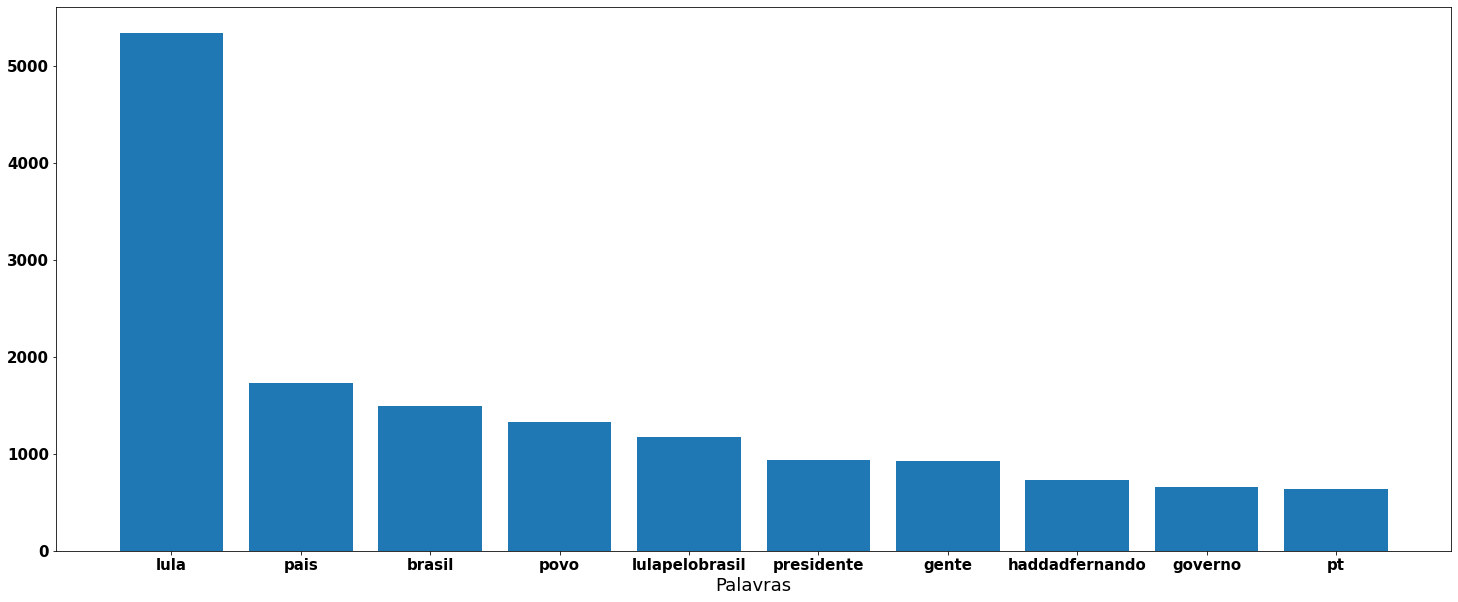

In [232]:
lula_plot=dataframe_lula_ordenado.head(10)
ax=plt.bar(x=lula_plot.Palavras,height=lula_plot.Quat)
plt.xlabel('Palavras', fontsize=18)

Text(0.5, 0, 'Palavras')

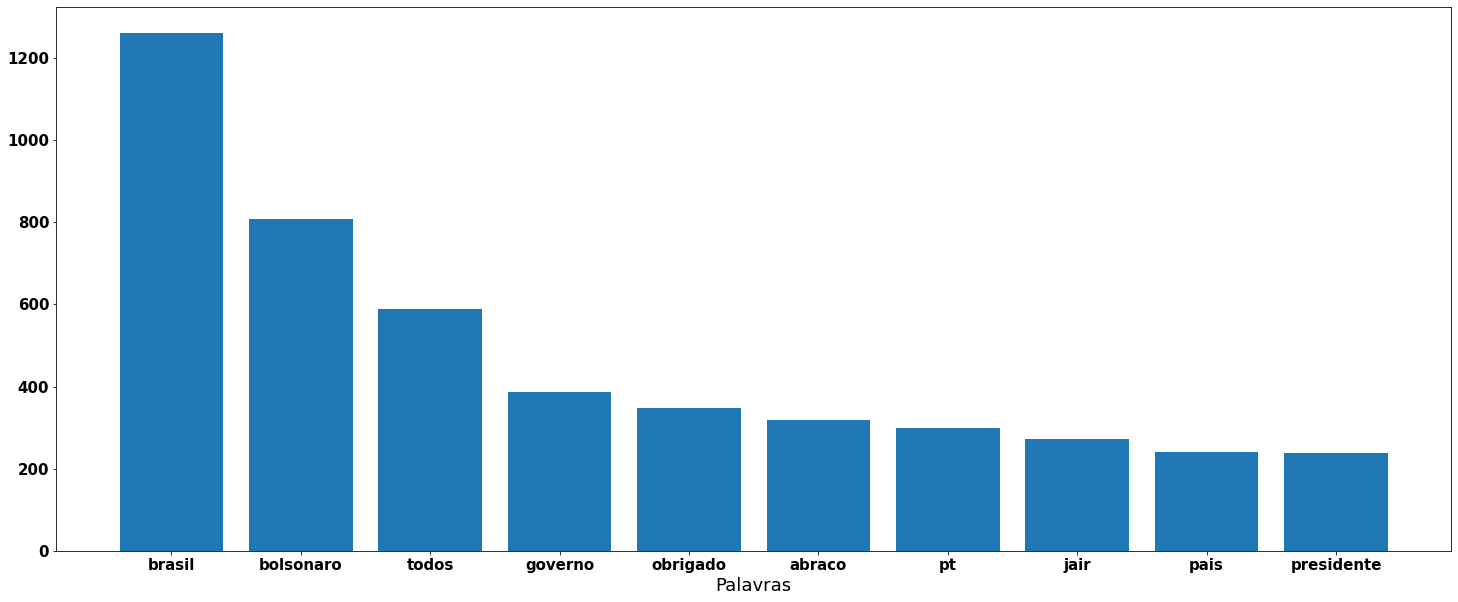

In [246]:
bozo_plot=dataframe_bozo_ordenado.head(10)
ax=plt.bar(x=bozo_plot.Palavras,height=bozo_plot.Quat)
plt.xlabel('Palavras', fontsize=18)